# HackerEarth ML Challenge: Adopt a buddy

## Problem Statement

A leading pet adopting agency is planning to create a virtual tour experience for their customers showcasing all animals that are available in their shelter. 
To enable this tour experience, we are required to predict pet type and breed based on its physical attributes and other factors.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for data visualization
%matplotlib inline
import seaborn as sns    # for data visualization
import warnings         # for ignoring warnings
warnings.filterwarnings


<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0,1


In [5]:
train.tail()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
18829,ANSL_51738,2017-01-26 00:00:00,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0,2
18830,ANSL_59900,2016-06-18 00:00:00,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2,4
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1,1
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1,2
18833,ANSL_73558,2011-12-13 00:00:00,2018-10-26 14:18:00,0.0,Brown,0.86,37.40,0,1,1,2


In [6]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


## information About features:

1. issue_date: The date on which pet was issued to the shelter.
2. listing_date: The date on which pet arrived at the shelter.
3. condition: Condition of the pet.
4. color_type: color of the pet.
5. length(m): length of pet in meters.
6. height(cm): height of pet in centimeters.
7. X1 & X2 : anonymous features.
8. breed_category: breed category of the pet(target variable)
9. pet_category: category of the pet(target variable).

In [7]:
print(train.shape)
print(test.shape)

(18834, 11)
(8072, 9)


In [23]:
train.dtypes

pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category      int64
pet_category        int64
dtype: object

# Exploratory Data Analysis

### missing values

In [8]:
train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

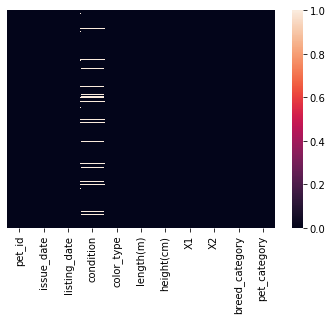

In [9]:
sns.heatmap(train.isnull(), yticklabels=False)

As above, only condition column has missing values(1477), which are roughly around 8% of the data.
if condition column has correlation with target/other variable we will try to fill those values or simply we can ignore condition column.lets check for correlation of variabls.

In [10]:
train.corr()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
condition,1.000000,-0.011219,-0.010793,0.338843,0.381696,-0.483503,-0.041660
length(m),-0.011219,1.000000,-0.004464,-0.002893,-0.011175,0.007229,-0.003999
height(cm),-0.010793,-0.004464,1.000000,-0.003801,-0.008216,0.011647,0.001976
X1,0.338843,-0.002893,-0.003801,1.000000,0.584396,0.240729,-0.032594
X2,0.381696,-0.011175,-0.008216,0.584396,1.000000,0.052530,-0.032116
breed_category,-0.483503,0.007229,0.011647,0.240729,0.052530,1.000000,0.209230
pet_category,-0.041660,-0.003999,0.001976,-0.032594,-0.032116,0.209230,1.000000


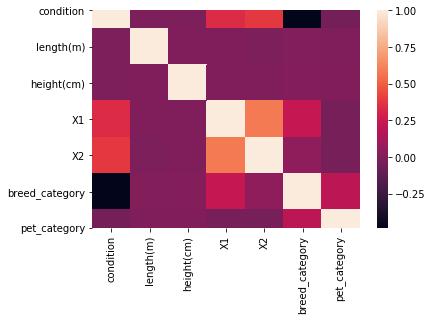

In [11]:
sns.heatmap(train.corr())

### Correlated variables
1. X1 - X2
2. X2 - breed_category
3. length(m) - breed_category

Condition feature is correlated to anonymous features X1 & X2 and in turn these features are correlated to breed category, so missing values are to be replaced by imputation.

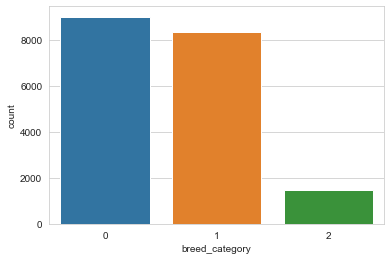

In [12]:
sns.set_style('whitegrid')
sns.countplot(train['breed_category'])

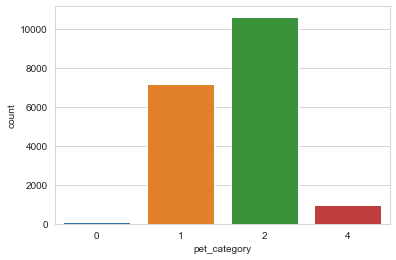

In [13]:
sns.set_style('whitegrid')
sns.countplot(train['pet_category'])

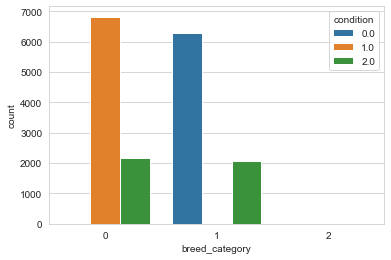

In [14]:
sns.set_style('whitegrid')
sns.countplot(x = 'breed_category', hue = 'condition', data = train)

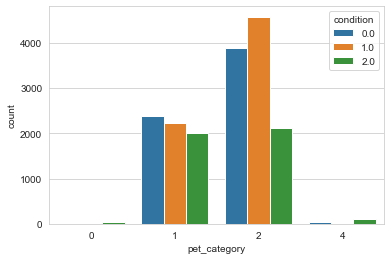

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'pet_category', hue = 'condition', data = train)

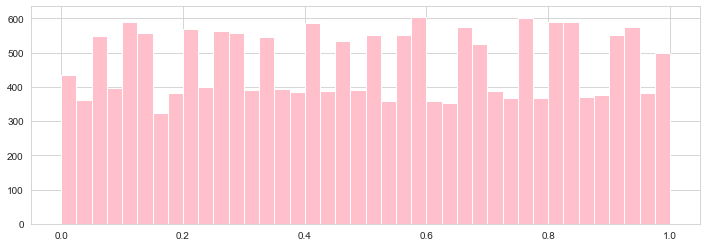

In [16]:
train['length(m)'].hist(color='pink',bins=40,figsize=(12,4))

In [63]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.892535,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.740270,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


## Filling missing values in condition variable with mode method.
    same method will be used to fill data in test data set

In [20]:
train['condition'].fillna(train['condition'].mode()[0], inplace = True)

In [21]:
test['condition'].fillna(test['condition'].mode()[0], inplace = True)

In [22]:
train.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

### Identifying outliers, if any and Treating them.

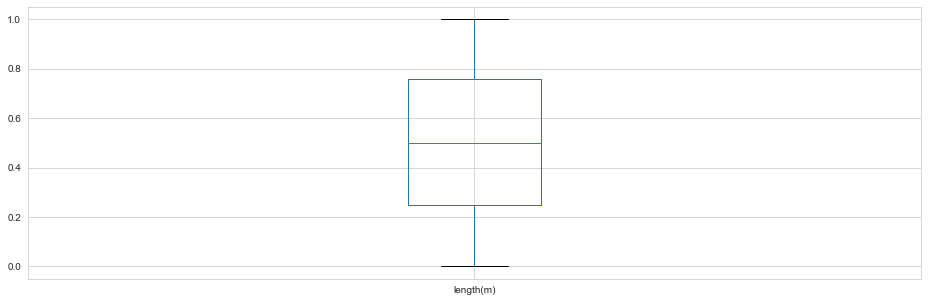

In [24]:
train['length(m)'].plot.box(figsize=(16,5))

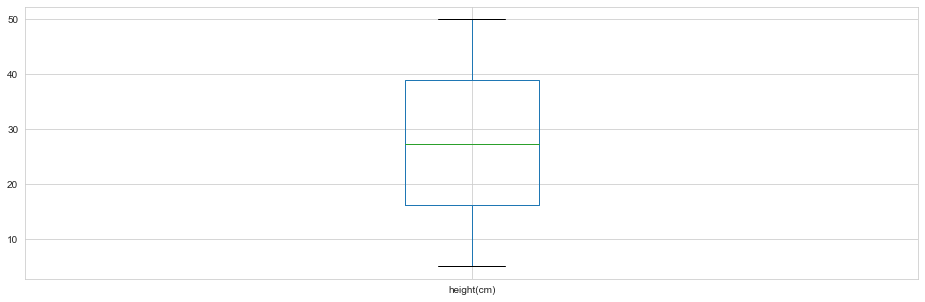

In [25]:
train['height(cm)'].plot.box(figsize=(16,5))

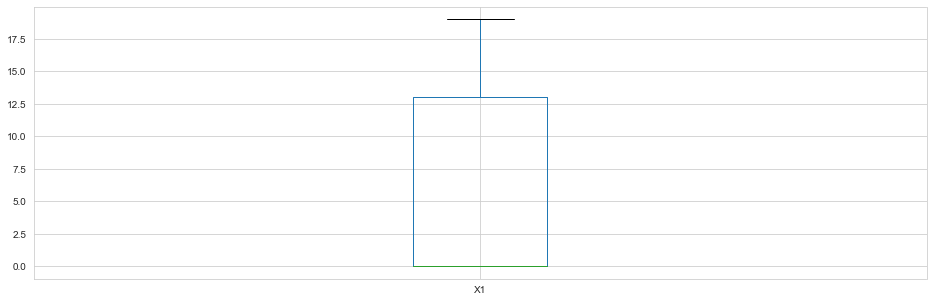

In [26]:
train['X1'].plot.box(figsize=(16,5))

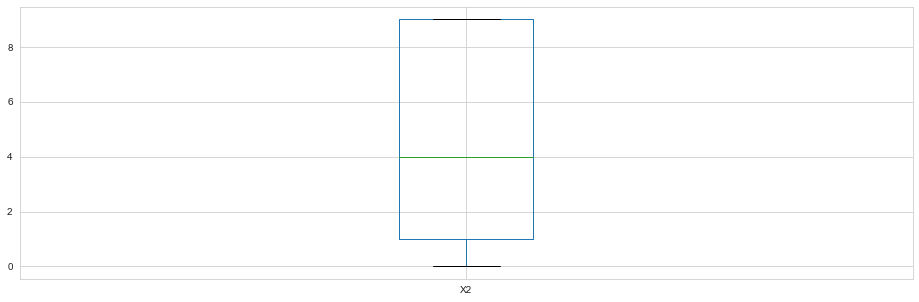

In [27]:
train['X2'].plot.box(figsize=(16,5))

In [28]:
A = pd.get_dummies(train['color_type'])

In [29]:
A.head()

,Agouti,Apricot,Black,Black Brindle,Black Smoke,Black Tabby,Black Tiger,Blue,Blue Cream,Blue Merle,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are no outliers in data and data preprocessing has been done,so now moving to build a ML model.

# Building a Logistic Regression model
lets start by spliting the data into a training and test set.

In [130]:
X = pd.concat([train[['condition', 'length(m)', 'height(cm)', 'X1', 'X2', 'pet_category']], pd.get_dummies(train['color_type'])],axis = 1)
X.head()

,condition,length(m),height(cm),X1,X2,pet_category,Agouti,Apricot,Black,Black Brindle,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,2.0,0.80,7.78,13,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.72,14.19,13,9,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.15,40.90,15,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.62,17.82,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,0.50,11.06,18,4,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
y = train['breed_category'].values

In [132]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.49606758,  1.0300209 , -1.51072853,  1.16101336,  1.25727915,
        -0.98780142, -0.01457487, -0.02628151, -0.57011548, -0.05930113,
        -0.04125466, -0.05411842, -0.00728686, -0.21767111, -0.02304857,
        -0.0745157 , -0.03260427, -0.01785145, -0.14465019, -0.03341032,
        -0.02304857, -0.32417146, -0.16446173, -0.04555239,  3.18813375,
        -0.01457487, -0.08173908, -0.13619679, -0.02524979, -0.11808248,
        -0.02186522, -0.09314554, -0.10121824, -0.09227164, -0.05261757,
        -0.04060386, -0.12872611, -0.0588486 , -0.02061418, -0.03177786,
        -0.01262188, -0.00728686, -0.07906328, -0.04555239, -0.20937936,
        -0.02061418, -0.16950106, -0.02628151, -0.03496697, -0.09458472,
        -0.06448774, -0.03571998, -0.01457487, -0.03092948, -0.27776221,
        -0.11408922, -0.14077664, -0.03718051, -0.15980522, -0.38697113,
        -0.08746851, -0.02823237],
       [ 0.14517407,  0.75291413, -1.01838767,  1.16101336,  1.25727915,
         0.40514

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
LR = LogisticRegression(C=0.01, solver = 'liblinear')
LR.fit(X_train,y_train)
yhat_LR = LR.predict(X_test)
yhat_LR[0:5]

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([2, 1, 0, 0, 0], dtype=int64)

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
accuracy = confusion_matrix(y_test, yhat_LR)
accuracy

array([[2339,  324,   15],
       [ 557, 1961,    6],
       [  60,  172,  217]], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accu = accuracy_score(y_test, yhat_LR)
accu

0.7993275526455494

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtree.fit(X_train,y_train)
yhat_tree = dtree.predict(X_test)
yhat_tree[0:5]

array([2, 1, 0, 0, 0], dtype=int64)

In [42]:
print("Decision Tree Accuracy:", accuracy_score(y_test, yhat_tree))

Decision Tree Accuracy: 0.8625022119978765


In [43]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat_svm = clf.predict(X_test)
yhat_svm[0:5]

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([2, 1, 0, 0, 0], dtype=int64)

In [44]:
print("SVM Accuracy:",accuracy_score(y_test, yhat_svm))

SVM Accuracy: 0.8494071845691028


In [45]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
confMx = []
for n in range(1,k):
    
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(yhat, y_test)
    
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.85737038, 0.85223854, 0.85347726, 0.8559547 , 0.8533003 ,
       0.85206158, 0.85117678, 0.84993806, 0.85011502])

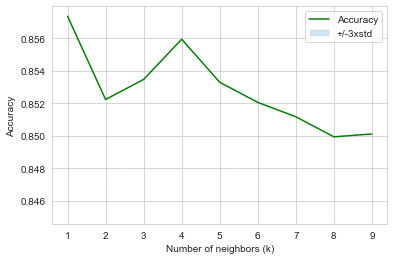

In [46]:
plt.plot(range(1,k), mean_acc,'g')
plt.fill_between(range(1,k), mean_acc - 1*std_acc, mean_acc - 1*std_acc, alpha = 0.20)
plt.legend(('Accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (k)')
plt.tight_layout
plt.show()

In [47]:
print("The best accuracy was ", mean_acc.max(), "with k = ", mean_acc.argmax()+1)

The best accuracy was  0.8573703769244382 with k =  1


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      2678
           1       0.80      0.78      0.79      2524
           2       0.91      0.48      0.63       449

    accuracy                           0.80      5651
   macro avg       0.83      0.71      0.75      5651
weighted avg       0.80      0.80      0.80      5651



## pet_category

In [94]:
X1 = pd.concat([train[['length(m)', 'height(cm)', 'X1', 'X2', 'breed_category']], pd.get_dummies(train['color_type'])],axis = 1)
X1.head()

,length(m),height(cm),X1,X2,breed_category,Agouti,Apricot,Black,Black Brindle,Black Smoke,...,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,0.80,7.78,13,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.72,14.19,13,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.15,40.90,15,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.62,17.82,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.50,11.06,18,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
y1 = train['pet_category'].values

In [141]:
X1 = preprocessing.StandardScaler().fit(X1).transform(X1)
X1[0:5]

array([[ 1.0300209 , -1.51072853,  1.16101336,  1.25727915, -0.95347717,
        -0.01457487, -0.02628151, -0.57011548, -0.05930113, -0.04125466,
        -0.05411842, -0.00728686, -0.21767111, -0.02304857, -0.0745157 ,
        -0.03260427, -0.01785145, -0.14465019, -0.03341032, -0.02304857,
        -0.32417146, -0.16446173, -0.04555239,  3.18813375, -0.01457487,
        -0.08173908, -0.13619679, -0.02524979, -0.11808248, -0.02186522,
        -0.09314554, -0.10121824, -0.09227164, -0.05261757, -0.04060386,
        -0.12872611, -0.0588486 , -0.02061418, -0.03177786, -0.01262188,
        -0.00728686, -0.07906328, -0.04555239, -0.20937936, -0.02061418,
        -0.16950106, -0.02628151, -0.03496697, -0.09458472, -0.06448774,
        -0.03571998, -0.01457487, -0.03092948, -0.27776221, -0.11408922,
        -0.14077664, -0.03718051, -0.15980522, -0.38697113, -0.08746851,
        -0.02823237],
       [ 0.75291413, -1.01838767,  1.16101336,  1.25727915, -0.95347717,
        -0.01457487, -0.02628

In [142]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 100)

In [143]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X1_train, y1_train)
yhat_svm = clf.predict(X1_test)
yhat_svm[0:5]

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([4, 2, 2, 2, 1], dtype=int64)

In [144]:
print("SVM Accuracy:",accuracy_score(y1_test, yhat_svm))

SVM Accuracy: 0.8561316581136083


In [145]:
LR = LogisticRegression(C=0.01, solver = 'liblinear')
LR.fit(X1_train,y1_train)
yhat_pet = LR.predict(X1_test)
yhat_pet[0:5]

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([1, 2, 2, 2, 1], dtype=int64)

In [146]:
accu = accuracy_score(y1_test, yhat_pet)
accu

0.8563086179437268

In [147]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=20)
dtree.fit(X1_train,y1_train)
yhat_tree = dtree.predict(X1_test)
yhat_tree[0:5]

array([4, 2, 2, 2, 1], dtype=int64)

In [148]:
print("Decision Tree Accuracy:", accuracy_score(y1_test, yhat_tree))

Decision Tree Accuracy: 0.8437444700053088


In [149]:
k = 10
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
confMx = []
for n in range(1,k):
    
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X1_train, y1_train)
    yhat = neigh.predict(X1_test)
    mean_acc[n-1] = accuracy_score(yhat, y1_test)
    
    
    std_acc[n-1] = np.std(yhat==y1_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.83365776, 0.81755442, 0.85170766, 0.84179791, 0.85807822,
       0.85117678, 0.85754734, 0.8533003 , 0.86002477])

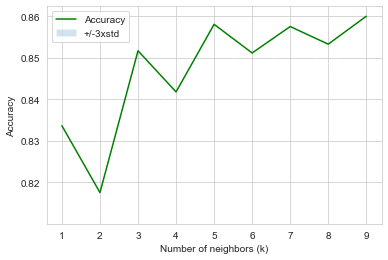

In [150]:
plt.plot(range(1,k), mean_acc,'g')
plt.fill_between(range(1,k), mean_acc - 1*std_acc, mean_acc - 1*std_acc, alpha = 0.20)
plt.legend(('Accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (k)')
plt.tight_layout
plt.show()

In [151]:
print("The best accuracy was ", mean_acc.max(), "with k = ", mean_acc.argmax()+1)

The best accuracy was  0.8600247743762166 with k =  9
